In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readImg(path):
    
    I = cv2.imread(path)[:256, :256, :]
    #I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    
    return I

In [3]:
def looknext(I, lc, rad = 50, gaussKernelSize = 25):
    # lc is a (mean, var) set of gaussian distribution
    x_c = int(np.random.normal(lc[0][0], lc[1][0], 1)[0])
    y_c = int(np.random.normal(lc[0][1], lc[1][1], 1)[0])
    
    blurred_img = cv2.GaussianBlur(I, (gaussKernelSize, gaussKernelSize), 0)

    mask = np.zeros(I.shape, dtype=np.uint8)
    mask = cv2.circle(mask, (x_c, y_c), rad, (255,255,255), -1)

    out = np.where(mask==np.array([255, 255, 255]), I, blurred_img)
    return out

shape of the image:  (256, 256, 3)


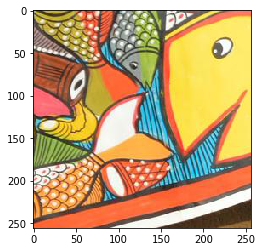

In [4]:
I = readImg('../datasets/highres_dataset2/00004_0.jpeg')
print("shape of the image: ", I.shape)
plt.imshow(I[:, :, ::-1])
plt.show()

In [5]:
blurred_img = cv2.GaussianBlur(I, (25, 25), 0)

mask = np.zeros(I.shape, dtype=np.uint8)
mask = cv2.circle(mask, (128, 128), 100, (255,255,255), -1)

out = np.where(mask!=np.array([255, 255, 255]), I, blurred_img)

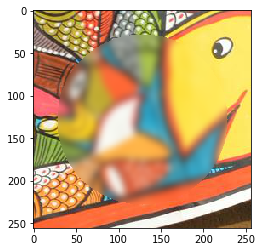

In [6]:
plt.imshow(out[:, :, ::-1])
plt.show()

## compute mse difference between w/ and w/o blurry

In [8]:
def MSE(I, ref):
    if I.max() > 1:
        I = I/255.0
    if ref.max() > 1:
        ref = ref/255.0
    return np.mean(np.square(I-ref))
print(MSE(out, I))

0.0001435389183246828


## compute mean of delta_centroid

In [9]:
deltas = []
for i in range(100):
    mu = np.random.rand(1, 2)*2-1

    noise = np.random.normal(0, 0.5, size = mu.shape)

    l = mu + noise
    # bound between [-1, 1]
    l = np.tanh(l)

    H, W, C = I.shape

    delta_centroid = np.abs((mu - l) * H) #np.abs to avoid pos and neg cancel each other.
    deltas.append(delta_centroid)
deltas = np.array(deltas)
deltas.mean()

81.97573340797967

In [3]:
a = np.array([1, 2, 3])
b = np.array([True, False, True])
a[b]

array([1, 3])

In [3]:
import torch
a = torch.randn(3, 4, 5, 6)
torch.mean(a, [1, 2, 3])

tensor([0.0035, 0.0569, 0.0800])

In [5]:
import numpy as np
np.random.randint(1, 33, size=32)

array([32, 27,  4, 26,  6, 28, 28, 25, 11,  9, 32, 18, 15, 19, 21,  3, 23,
       24,  1,  2, 14, 27, 30, 24, 18,  4,  2, 30, 14, 16, 21, 18])